# Setting GhostScript file location and Java environment variables (for farther down the script)

In [1]:
import os

path_to_gs = "C:/Program Files (x86)/gs/gs9.52/bin"
os.environ['PATH'] += os.pathsep + path_to_gs

java_path = "C:/Program Files/Java/jdk-14/bin/java.exe"
os.environ['JAVAHOME'] = java_path
print('DONE!')

DONE!


# Removing HTML Tags

In [2]:
import requests

data = requests.get('http://www.gutenberg.org/cache/epub/8001/pg8001.html')
content = data.content
print(content[1163:2200])

b'a name="generator" content="Ebookmaker 0.8.8 by Project Gutenberg"/>\r\n</head>\r\n  <body><p id="id00000">Project Gutenberg EBook The Bible, King James, Book 1: Genesis</p>\r\n\r\n<p id="id00001">Copyright laws are changing all over the world. Be sure to check the\r\ncopyright laws for your country before downloading or redistributing\r\nthis or any other Project Gutenberg eBook.</p>\r\n\r\n<p id="id00002">This header should be the first thing seen when viewing this Project\r\nGutenberg file.  Please do not remove it.  Do not change or edit the\r\nheader without written permission.</p>\r\n\r\n<p id="id00003">Please read the "legal small print," and other information about the\r\neBook and Project Gutenberg at the bottom of this file.  Included is\r\nimportant information about your specific rights and restrictions in\r\nhow the file may be used.  You can also find out about how to make a\r\ndonation to Project Gutenberg, and how to get involved.</p>\r\n\r\n<p id="id00004" style="mar

In [3]:
import re
from bs4 import BeautifulSoup

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r|\n]+', '\n', stripped_text)
    return stripped_text

clean_content = strip_html_tags(content)
print(clean_content[1163:2045])

*** START OF THE PROJECT GUTENBERG EBOOK, THE BIBLE, KING JAMES, BOOK 1***
This eBook was produced by David Widger
with the help of Derek Andrew's text from January 1992
and the work of Bryan Taylor in November 2002.
Book 01        Genesis
01:001:001 In the beginning God created the heaven and the earth.
01:001:002 And the earth was without form, and void; and darkness was
           upon the face of the deep. And the Spirit of God moved upon
           the face of the waters.
01:001:003 And God said, Let there be light: and there was light.
01:001:004 And God saw the light, that it was good: and God divided the
           light from the darkness.
01:001:005 And God called the light Day, and the darkness he called
           Night. And the evening and the morning were the first day.
01:001:006 And God said, Let there be a firmament in the midst of the
           waters,


# Sentence tokenization

In [4]:
import nltk
from nltk.corpus import gutenberg
from pprint import pprint
import numpy as np

#loading text corpora
alice = gutenberg.raw(fileids='carroll-alice.txt')
sample_text = ("US unveils world's most powerful supercomputer, beats China. "
               "The US has unveiled the world's most powerful supercomputer called 'Summit', "
               "beating the previous record-holder China's Sunway TaihuLight. With a peak performance "
               "of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, "
               "which is capable of 93,000 trillion calculations per second. Summit has 4,608 servers, "
               "which reportedly take up the size of two tennis courts.")
sample_text

"US unveils world's most powerful supercomputer, beats China. The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight. With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second. Summit has 4,608 servers, which reportedly take up the size of two tennis courts."

In [5]:
#Total characters in Alice in Wonderland
len(alice)

#First 100 characters in the corpus
alice[0:100]

"[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was"

In [6]:
default_st = nltk.sent_tokenize
alice_sentences = default_st(text=alice)
sample_sentences = default_st(text=sample_text)

print('Total sentences in sample_text:', len(sample_sentences))
print('Sample text sentences:-')
print(np.array(sample_sentences))

print('\nTotal sentences in alice:', len(alice_sentences))
print('First 5 sentences in alice:-')
print(np.array(alice_sentences[0:5]))

Total sentences in sample_text: 4
Sample text sentences:-
["US unveils world's most powerful supercomputer, beats China."
 "The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight."
 'With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second.'
 'Summit has 4,608 servers, which reportedly take up the size of two tennis courts.']

Total sentences in alice: 1625
First 5 sentences in alice:-
["[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I."
 "Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, 'and what is the use of a book,' thought Alice 'without pictures or\nconversation?'"
 '

In [7]:
#Pretrained Sentence Tokenizer Models
from nltk.corpus import europarl_raw

german_text = europarl_raw.german.raw(fileids='ep-00-01-17.de')
#Total characters in the corpus
print(len(german_text))
#First 100 characters in the corpus
print(german_text[0:100])

157171
 
Wiederaufnahme der Sitzungsperiode Ich erkläre die am Freitag , dem 17. Dezember unterbrochene Sit


In [8]:
#default sentnece tokenizer
german_sentences_def = default_st(text=german_text, language='german')

#loading german text tokenizer into a PunktSentenceTokenizer instance
german_tokenizer = nltk.data.load(resource_url='tokenizers/punkt/german.pickle')
german_sentences = german_tokenizer.tokenize(german_text)

#verify the type of german_tokenizer
#should be PunktSentenceTokenizer
print(type(german_tokenizer))

#check if results of both tokenizers match
#should be True
print(german_sentences_def == german_sentences)

<class 'nltk.tokenize.punkt.PunktSentenceTokenizer'>
True


In [9]:
#print first 5 sentences of the corpus
print(np.array(german_sentences[:5]))

[' \nWiederaufnahme der Sitzungsperiode Ich erkläre die am Freitag , dem 17. Dezember unterbrochene Sitzungsperiode des Europäischen Parlaments für wiederaufgenommen , wünsche Ihnen nochmals alles Gute zum Jahreswechsel und hoffe , daß Sie schöne Ferien hatten .'
 'Wie Sie feststellen konnten , ist der gefürchtete " Millenium-Bug " nicht eingetreten .'
 'Doch sind Bürger einiger unserer Mitgliedstaaten Opfer von schrecklichen Naturkatastrophen geworden .'
 'Im Parlament besteht der Wunsch nach einer Aussprache im Verlauf dieser Sitzungsperiode in den nächsten Tagen .'
 'Heute möchte ich Sie bitten - das ist auch der Wunsch einiger Kolleginnen und Kollegen - , allen Opfern der Stürme , insbesondere in den verschiedenen Ländern der Europäischen Union , in einer Schweigeminute zu gedenken .']


In [10]:
punkt_st = nltk.tokenize.PunktSentenceTokenizer()
sample_sentences = punkt_st.tokenize(sample_text)
print(np.array(sample_sentences))

["US unveils world's most powerful supercomputer, beats China."
 "The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight."
 'With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second.'
 'Summit has 4,608 servers, which reportedly take up the size of two tennis courts.']


In [11]:
#RegexpTokenizer
SENTENCE_TOKENS_PATTERN = r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<![A-Z]\.)(?<=\.|\?|\!)\s'

regex_st = nltk.tokenize.RegexpTokenizer(
                                pattern=SENTENCE_TOKENS_PATTERN,
                                gaps=True)
sample_sentences = regex_st.tokenize(sample_text)
print(np.array(sample_sentences))

["US unveils world's most powerful supercomputer, beats China."
 "The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight."
 'With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second.'
 'Summit has 4,608 servers, which reportedly take up the size of two tennis courts.']


# Word Tokenization

In [12]:
#Default word tokenizer
default_wt = nltk.word_tokenize
words = default_wt(sample_text)
np.array(words)

array(['US', 'unveils', 'world', "'s", 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China', '.', 'The', 'US', 'has',
       'unveiled', 'the', 'world', "'s", 'most', 'powerful',
       'supercomputer', 'called', "'Summit", "'", ',', 'beating', 'the',
       'previous', 'record-holder', 'China', "'s", 'Sunway', 'TaihuLight',
       '.', 'With', 'a', 'peak', 'performance', 'of', '200,000',
       'trillion', 'calculations', 'per', 'second', ',', 'it', 'is',
       'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',',
       'which', 'is', 'capable', 'of', '93,000', 'trillion',
       'calculations', 'per', 'second', '.', 'Summit', 'has', '4,608',
       'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

In [13]:
#TreebankWordTokenizer
treebank_wt = nltk.TreebankWordTokenizer()
words = treebank_wt.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', 'world', "'s", 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China.', 'The', 'US', 'has',
       'unveiled', 'the', 'world', "'s", 'most', 'powerful',
       'supercomputer', 'called', "'Summit", "'", ',', 'beating', 'the',
       'previous', 'record-holder', 'China', "'s", 'Sunway',
       'TaihuLight.', 'With', 'a', 'peak', 'performance', 'of', '200,000',
       'trillion', 'calculations', 'per', 'second', ',', 'it', 'is',
       'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',',
       'which', 'is', 'capable', 'of', '93,000', 'trillion',
       'calculations', 'per', 'second.', 'Summit', 'has', '4,608',
       'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

In [14]:
#TokTok Tokenizer
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
words = tokenizer.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', 'world', "'", 's', 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China.', 'The', 'US', 'has',
       'unveiled', 'the', 'world', "'", 's', 'most', 'powerful',
       'supercomputer', 'called', "'", 'Summit', "'", ',', 'beating',
       'the', 'previous', 'record-holder', 'China', "'", 's', 'Sunway',
       'TaihuLight.', 'With', 'a', 'peak', 'performance', 'of', '200,000',
       'trillion', 'calculations', 'per', 'second', ',', 'it', 'is',
       'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',',
       'which', 'is', 'capable', 'of', '93,000', 'trillion',
       'calculations', 'per', 'second.', 'Summit', 'has', '4,608',
       'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

In [15]:
#RegexpTokenizer
#pattern to identify tokens themselves
TOKEN_PATTERN = r'\w+'
regex_wt = nltk.RegexpTokenizer(pattern=TOKEN_PATTERN, gaps = False)
words = regex_wt.tokenize(sample_text)
np.array(words)

#pattern to identify tokens by using gaps between tokens
GAP_PATTERN = r'\s+'
regex_st = nltk.RegexpTokenizer(pattern=GAP_PATTERN, gaps=True)
words = regex_st.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', "world's", 'most', 'powerful', 'supercomputer,',
       'beats', 'China.', 'The', 'US', 'has', 'unveiled', 'the',
       "world's", 'most', 'powerful', 'supercomputer', 'called',
       "'Summit',", 'beating', 'the', 'previous', 'record-holder',
       "China's", 'Sunway', 'TaihuLight.', 'With', 'a', 'peak',
       'performance', 'of', '200,000', 'trillion', 'calculations', 'per',
       'second,', 'it', 'is', 'over', 'twice', 'as', 'fast', 'as',
       'Sunway', 'TaihuLight,', 'which', 'is', 'capable', 'of', '93,000',
       'trillion', 'calculations', 'per', 'second.', 'Summit', 'has',
       '4,608', 'servers,', 'which', 'reportedly', 'take', 'up', 'the',
       'size', 'of', 'two', 'tennis', 'courts.'], dtype='<U14')

In [16]:
#Getting indices for tokenized words
word_indices = list(regex_wt.span_tokenize(sample_text))
print(word_indices)
print(np.array([sample_text[start:end] for start,end in word_indices]))

[(0, 2), (3, 10), (11, 16), (17, 18), (19, 23), (24, 32), (33, 46), (48, 53), (54, 59), (61, 64), (65, 67), (68, 71), (72, 80), (81, 84), (85, 90), (91, 92), (93, 97), (98, 106), (107, 120), (121, 127), (129, 135), (138, 145), (146, 149), (150, 158), (159, 165), (166, 172), (173, 178), (179, 180), (181, 187), (188, 198), (200, 204), (205, 206), (207, 211), (212, 223), (224, 226), (227, 230), (231, 234), (235, 243), (244, 256), (257, 260), (261, 267), (269, 271), (272, 274), (275, 279), (280, 285), (286, 288), (289, 293), (294, 296), (297, 303), (304, 314), (316, 321), (322, 324), (325, 332), (333, 335), (336, 338), (339, 342), (343, 351), (352, 364), (365, 368), (369, 375), (377, 383), (384, 387), (388, 389), (390, 393), (394, 401), (403, 408), (409, 419), (420, 424), (425, 427), (428, 431), (432, 436), (437, 439), (440, 443), (444, 450), (451, 457)]
['US' 'unveils' 'world' 's' 'most' 'powerful' 'supercomputer' 'beats'
 'China' 'The' 'US' 'has' 'unveiled' 'the' 'world' 's' 'most' 'powe

In [17]:
#Inherited Tokenizers from RegexpTokenizer
wordpunkt_wt = nltk.WordPunctTokenizer()
words = wordpunkt_wt.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', 'world', "'", 's', 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China', '.', 'The', 'US', 'has',
       'unveiled', 'the', 'world', "'", 's', 'most', 'powerful',
       'supercomputer', 'called', "'", 'Summit', "',", 'beating', 'the',
       'previous', 'record', '-', 'holder', 'China', "'", 's', 'Sunway',
       'TaihuLight', '.', 'With', 'a', 'peak', 'performance', 'of', '200',
       ',', '000', 'trillion', 'calculations', 'per', 'second', ',', 'it',
       'is', 'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight',
       ',', 'which', 'is', 'capable', 'of', '93', ',', '000', 'trillion',
       'calculations', 'per', 'second', '.', 'Summit', 'has', '4', ',',
       '608', 'servers', ',', 'which', 'reportedly', 'take', 'up', 'the',
       'size', 'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

In [18]:
#Whitespace Tokenizer
whitespace_wt = nltk.WhitespaceTokenizer()
words = whitespace_wt.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', "world's", 'most', 'powerful', 'supercomputer,',
       'beats', 'China.', 'The', 'US', 'has', 'unveiled', 'the',
       "world's", 'most', 'powerful', 'supercomputer', 'called',
       "'Summit',", 'beating', 'the', 'previous', 'record-holder',
       "China's", 'Sunway', 'TaihuLight.', 'With', 'a', 'peak',
       'performance', 'of', '200,000', 'trillion', 'calculations', 'per',
       'second,', 'it', 'is', 'over', 'twice', 'as', 'fast', 'as',
       'Sunway', 'TaihuLight,', 'which', 'is', 'capable', 'of', '93,000',
       'trillion', 'calculations', 'per', 'second.', 'Summit', 'has',
       '4,608', 'servers,', 'which', 'reportedly', 'take', 'up', 'the',
       'size', 'of', 'two', 'tennis', 'courts.'], dtype='<U14')

# Building Robust Tokenizers with NLTK and spaCy

In [19]:
def tokenize_text(text):
    sentences = nltk.sent_tokenize(text)
    word_tokens = [nltk.word_tokenize(sentence) for sentence in sentences]
    return word_tokens
sents = tokenize_text(sample_text)
np.array(sents)

words = [word for sentence in sents for word in sentence]
np.array(words)

array(['US', 'unveils', 'world', "'s", 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China', '.', 'The', 'US', 'has',
       'unveiled', 'the', 'world', "'s", 'most', 'powerful',
       'supercomputer', 'called', "'Summit", "'", ',', 'beating', 'the',
       'previous', 'record-holder', 'China', "'s", 'Sunway', 'TaihuLight',
       '.', 'With', 'a', 'peak', 'performance', 'of', '200,000',
       'trillion', 'calculations', 'per', 'second', ',', 'it', 'is',
       'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',',
       'which', 'is', 'capable', 'of', '93,000', 'trillion',
       'calculations', 'per', 'second', '.', 'Summit', 'has', '4,608',
       'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

In [20]:
#spaCy
import spacy
nlp = spacy.load('en', parse = True, entity = True, tag = True)
text_spacy = nlp(sample_text)

sents = np.array(list(text_spacy.sents))
sents

sent_words = [[word.text for word in sent] for sent in sents]
np.array(sent_words)

words = [word.text for word in text_spacy]
np.array(words)

array(['US', 'unveils', 'world', "'s", 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China', '.', 'The', 'US', 'has',
       'unveiled', 'the', 'world', "'s", 'most', 'powerful',
       'supercomputer', 'called', "'", 'Summit', "'", ',', 'beating',
       'the', 'previous', 'record', '-', 'holder', 'China', "'s",
       'Sunway', 'TaihuLight', '.', 'With', 'a', 'peak', 'performance',
       'of', '200,000', 'trillion', 'calculations', 'per', 'second', ',',
       'it', 'is', 'over', 'twice', 'as', 'fast', 'as', 'Sunway',
       'TaihuLight', ',', 'which', 'is', 'capable', 'of', '93,000',
       'trillion', 'calculations', 'per', 'second', '.', 'Summit', 'has',
       '4,608', 'servers', ',', 'which', 'reportedly', 'take', 'up',
       'the', 'size', 'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

# Removing Accented Characters - function

In [21]:
import unicodedata

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

# Dealing with Contractions

In [22]:
#CONTRACTION_MAP
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

# Expanding Contractions Function

In [23]:
import re

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags = re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
    
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

#Example usage
expand_contractions("Y'all can't expand contractions I'd think")

'You all cannot expand contractions I would think'

# Removing Specail Characters Function (default for removing digits is False)

In [24]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("Well this was fun! What do you think? 123#@!", remove_digits=True)

'Well this was fun What do you think '

# Case conversions

In [25]:
text = 'The quick brown fox jumped over The Big Dog'

#lowercase
text.lower()

#uppercase
text.upper()

#title case
text.title()

'The Quick Brown Fox Jumped Over The Big Dog'

# Text Correction

In [26]:
#Correcting Repeating Characters
old_word = 'finalllyyy'
repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
match_substitution = r'\1\2\3'
step = 1

while True:
    #remove one repeated character
    new_word = repeat_pattern.sub(match_substitution, old_word)
    if new_word != old_word:
        print('Step: {} Word: {}'.format(step, new_word))
        step += 1 #update step
        #update old word to last substituted state
        old_word = new_word
        continue
    else:
        print("Final word:", new_word)
        break
#in this case, the final word 'finaly' is incorrect, will need a corpus of words to fix

Step: 1 Word: finalllyy
Step: 2 Word: finallly
Step: 3 Word: finally
Step: 4 Word: finaly
Final word: finaly


In [27]:
from nltk.corpus import wordnet
old_word = 'finalllyyy'
repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
match_substitution = r'\1\2\3'
step = 1

while True:
    #check for semantically correct word
    if wordnet.synsets(old_word):
        print("Final word:", old_word)
        break
    #remove one repeated character
    new_word = repeat_pattern.sub(match_substitution, old_word)
    if new_word != old_word:
        print('Step: {} Word: {}'.format(step, new_word))
        step += 1 #update step
        #update old word to last substituted state
        old_word = new_word
        continue
    else:
        print("Final word:", new_word)
        break

Step: 1 Word: finalllyy
Step: 2 Word: finallly
Step: 3 Word: finally
Final word: finally


In [28]:
#writing previous logic into a function
from nltk.corpus import wordnet

def remove_repeated_characters(tokens):
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    match_substitution = r'\1\2\3'
    def replace(old_word):
        if wordnet.synsets(old_word):
            return old_word
        new_word = repeat_pattern.sub(match_substitution, old_word)
        return replace(new_word) if new_word != old_word else new_word
    correct_tokens = [replace(word) for word in tokens]
    return correct_tokens

#Example Usage
sample_sentence = 'My schooool is realllllyyy amaaazingggg'
correct_tokens = remove_repeated_characters(nltk.word_tokenize(sample_sentence))
' '.join(correct_tokens)

'My school is really amazing'

# Correct Spellings

In [29]:
import re, collections

def tokens(text):
    '''
    Get all words from the corpus
    '''
    return re.findall('[a-z]+', text.lower())
WORDS = tokens(open('C:/Users/trevo.DESKTOP-Q3G2N9L/Documents/Natural Language Processing/Text Analytics with Python/big.txt').read())
WORD_COUNTS = collections.Counter(WORDS)
#top 10 words in the corpus by count
WORD_COUNTS.most_common(10)

[('the', 80030),
 ('of', 40025),
 ('and', 38313),
 ('to', 28766),
 ('in', 22050),
 ('a', 21155),
 ('that', 12512),
 ('he', 12401),
 ('was', 11410),
 ('it', 10681)]

In [30]:
#Fixing words that are 0,1, or 2 edits away from the original word
def edits0(word):
    '''
    Return all strings that are zero edits away from the input word (i.e., the word itself)
    '''
    return{word}

def edits1(word):
    '''
    Return all strings that are one edit away from teh input word
    '''
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    def splits(word):
        '''
        Return a list of all possible (first, rest) pairs that the input word is made of.
        '''
        return[(word[:i], word[i:]) for i in range(len(word)+1)]
    pairs      = splits(word)
    deletes    = [a+b[1:]           for (a, b) in pairs if b]
    transposes = [a+b[1]+b[0]+b[2:] for (a, b) in pairs if len(b) >1]
    replaces   = [a+c+b[1:]         for (a, b) in pairs for c in alphabet if b]
    inserts    = [a+c+b             for (a, b) in pairs for c in alphabet]
    return set(deletes + transposes + replaces + inserts)

def edits2(word):
    '''
    Return all strings that are two edits away from the input word
    '''
    return {e2 for e1 in edits1(word) for e2 in edits1(e1)}

def known(words):
    '''
    Return the subset of wrods that are actually in our WORD_COUNTS dictionary
    '''
    return {w for w in words if w in WORD_COUNTS}

In [31]:
#Example usage
#input word
word = 'fianlly'
#zero edit distance from input word
edits0(word) 

#returns null set since it is not a valid word
known(edits0(word))

#one edit distance from input word
edits1(word)

#get correct words from above set
known(edits1(word))

{'finally'}

In [32]:
#two edit distances from input word
edits2(word)

#get correct words from above set
known(edits2(word))

{'faintly', 'finally', 'finely', 'frankly'}

In [33]:
#choosing the correct word
candidates = (known(edits0(word)) or
              known(edits1(word)) or
              known(edits2(word)) or
             [word])
candidates

{'finally'}

In [34]:
#Function to get the best correct spelling for the input word - FUNCTION IS CASE SENSITIVE
def correct(word):
    '''
    Get the best correct spelling for the input word
    '''
    #priority is for edit distance 0, then 1, then 2
    #else defaults to the input word itself.
    candidates = (known(edits0(word)) or
                  known(edits1(word)) or
                  known(edits2(word)) or
                  [word])
    return max(candidates, key=WORD_COUNTS.get)

print('Correct:', correct('fianlly'), '\nIncorrect:', correct('FIANLLY'))

Correct: finally 
Incorrect: FIANLLY


In [35]:
#Same function as before but preserves case sensitivity
def correct_match(match):
    '''
    Spell-corrected word in match, and preserve proper upper/lower/title case.
    '''
    
    word = match.group()
    def case_of(text):
        '''
        Return the case-function appropriate for text: upper, lower, title, or just str.:
        '''
        return(str.upper if text.isupper() else
               str.lower if text.islower() else
               str.title if text.istitle() else
               str)
    return case_of(word)(correct(word.lower()))

def correct_text_generic(text):
    '''
    Correct all the words within a text, returning the corrected text.
    '''
    return re.sub('[a-zA-Z]+', correct_match, text)

#Example usage
print('Correct:', correct_text_generic('fianlly'), '\nAlso Correct:', correct_text_generic('FIANLLY'))

Correct: finally 
Also Correct: FINALLY


In [36]:
#Textblob
from textblob import Word
w = Word('fianlly')
w.correct()

#check suggestions
w.spellcheck()

#another example
w = Word('flaot')
w.spellcheck()

[('flat', 0.85), ('float', 0.15)]

# Stemming

In [37]:
#Porter Stemmer - most frequently used
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps.stem('jumping'), ps.stem('jumps'), ps.stem('jumped')

('jump', 'jump', 'jump')

In [38]:
ps.stem('lying'), ps.stem('strange')


('lie', 'strang')

In [39]:
#Lancaster Stemmer
from nltk.stem import LancasterStemmer
ls = LancasterStemmer()
ls.stem('jumping'), ls.stem('jumps'), ls.stem('jumped')

('jump', 'jump', 'jump')

In [40]:
ls.stem('lying'), ls.stem('strange')

('lying', 'strange')

In [41]:
#Regex based Stemmer
from nltk import RegexpStemmer
rs = RegexpStemmer('ing$|s$|ed$', min = 4)
rs.stem('jumping'), rs.stem('jumps'), rs.stem('jumped')

('jump', 'jump', 'jump')

In [42]:
rs.stem('lying'), rs.stem('strange')

('ly', 'strange')

In [43]:
#Using the Snowball Stemmer to stem in other languages
from nltk.stem import SnowballStemmer
ss = SnowballStemmer("german")
print('Supported Languages:', SnowballStemmer.languages)

Supported Languages: ('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


In [44]:
#Stemming on german words
# autobahnen -> cars
# autobahn -> car
ss.stem('autobahnen')

'autobahn'

In [45]:
#springen -> jumping
#spring -> jump
ss.stem('springen')

'spring'

In [46]:
#Basic function to use for stemming text (Using the Porter Stemmer but can be interchanged)
def simple_stemmer(text):
    ps = nltk.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text
simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'My system keep crash hi crash yesterday, our crash daili'

# Lemmatization
### removing word affixes to get to a base form of the word

In [47]:
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

#lemmatize nouns
print('Nouns:')
print(wnl.lemmatize('cars', 'n'), ',', wnl.lemmatize('men', 'n'), '\n')


#lemmatize verbs
print('Verbs:') #breaking up groups in output
print(wnl.lemmatize('running', 'v'), ',', wnl.lemmatize('ate', 'v'), '\n')

#lemmatize adjectives
print('Adjectives:')
print(wnl.lemmatize('saddest', 'a'), ',', wnl.lemmatize('fancier', 'a'))

Nouns:
car , men 

Verbs:
run , eat 

Adjectives:
sad , fancy


In [48]:
#Ineffective version of lemmatization by labeling a word as the wrong POS
#nothing happens because we labeled 'ate' as a noun and 'fancier' as a verb
print('Incorrect Version of Lemmatization:')
print('\t', wnl.lemmatize('ate', 'n'), ',', wnl.lemmatize('fancier', 'v'))

Incorrect Version of Lemmatization:
	 ate , fancier


In [49]:
#creating a function that lemmatizes words
import spacy

nlp = spacy.load('en', entity=True, parse=True, tag=True)
text = 'My system keeps crashing his crashed yesterday, ours crashes daily'

def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text(text)

'My system keep crash his crashed yesterday , ours crash daily'

# Removing Stopwords

In [50]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

remove_stopwords("The, and, if are stopwords, computer is not")
'''Important note: Negations like "not" and "no" are removed in this case (in the first sentence) and often it
    is essential to preserve them so as the actual meaning of the sentence is not lost in applications like
    sentiment analysis. Do not remove these words in these scenarios
'''

'Important note: Negations like "not" and "no" are removed in this case (in the first sentence) and often it\n    is essential to preserve them so as the actual meaning of the sentence is not lost in applications like\n    sentiment analysis. Do not remove these words in these scenarios\n'

# Bringing it all Together - Building a Text Normalizer

In [51]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                    accented_char_removal=True, text_lower_case=True, text_lemmatization=True,
                    special_char_removal=True, stopword_removal=True, remove_digits=True):
    normalized_corpus = []
    #normalize each document in the corpus
    for doc in corpus:
        #strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        #remove accented character
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        #expand contractions
        if contraction_expansion:
            doc = expand_contractions(doc)
        #lowercase the text
        if text_lower_case:
            doc = doc.lower()
        #remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ', doc)
        #lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        #remove special characters and/or digits
        if special_char_removal:
            #insert spaces b/w special characters to isolate them
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = remove_special_characters(doc, remove_digits=remove_digits)
        #remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        #remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
        normalized_corpus.append(doc)
        
    return normalized_corpus

{'Original': sample_text,
 'Processed': normalize_corpus([sample_text])[0]}

{'Original': "US unveils world's most powerful supercomputer, beats China. The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight. With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second. Summit has 4,608 servers, which reportedly take up the size of two tennis courts.",
 'Processed': 'us unveil world powerful supercomputer beat china us unveil world powerful supercomputer call summit beat previous record holder china sunway taihulight peak performance trillion calculation per second twice fast sunway taihulight capable trillion calculation per second summit server reportedly take size two tennis court'}

# Building POS Taggers

In [52]:
#POS tagging with Spacy
sentence = "US unveils world's most powerful supercomputer, beats China."

import pandas as pd
import spacy

nlp = spacy.load('en', entity=True, parse=True, tag=True)
sentence_nlp = nlp(sentence)

spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type']).T

,0,1,2,3,4,5,6,7,8,9,10
Word,US,unveils,world,'s,most,powerful,supercomputer,",",beats,China,.
POS tag,NNP,NNS,NN,POS,RBS,JJ,NN,",",VBZ,NNP,.
Tag type,PROPN,NOUN,NOUN,PART,ADV,ADJ,NOUN,PUNCT,VERB,PROPN,PUNCT


In [53]:
#POS tagging with NLTK
import nltk
nltk_pos_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag']).T

,0,1,2,3,4,5,6,7,8,9,10
Word,US,unveils,world,'s,most,powerful,supercomputer,",",beats,China,.
POS tag,NNP,JJ,NN,POS,RBS,JJ,NN,",",VBZ,NNP,.


In [54]:
#Training a tagger
from nltk.corpus import treebank
data = treebank.tagged_sents()
train_data = data[:3500]
test_data = data[3500:]
print(train_data[0])

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]


In [55]:
#Default tagger
from nltk.tag import DefaultTagger

dt = DefaultTagger('NN')
#accuracy on test data
print('Test Data Accuracy:', round(dt.evaluate(test_data)*100, 2), '%')

#tagging our headline
dt.tag(nltk.word_tokenize(sentence)) #only tags things as nouns

Test Data Accuracy: 14.54 %


[('US', 'NN'),
 ('unveils', 'NN'),
 ('world', 'NN'),
 ("'s", 'NN'),
 ('most', 'NN'),
 ('powerful', 'NN'),
 ('supercomputer', 'NN'),
 (',', 'NN'),
 ('beats', 'NN'),
 ('China', 'NN'),
 ('.', 'NN')]

In [56]:
#Regex tagger (specified rules)
from nltk.tag import RegexpTagger

#define regex tag patterns
patterns = [
    (r'.*ing$', 'VBG'),               #gerunds
    (r'.*ed$', 'VBD'),                #simple past tense
    (r'.*es$', 'VBZ'),                #3rd singular present
    (r'.*ould$', 'MD'),               #modals
    (r'.*\'s$', 'NN$'),               #possessive nouns
    (r'.*s$', 'NNS'),                 #plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  #cardinal numbers
    (r'.*', 'NN')                     #nouns (default)...
]

rt = RegexpTagger(patterns)

#accuracy on test data
print('Test Data Accuracy:', round(rt.evaluate(test_data)*100, 2), '%')

#tagging our sample headline
rt.tag(nltk.word_tokenize(sentence))

Test Data Accuracy: 24.04 %


[('US', 'NN'),
 ('unveils', 'NNS'),
 ('world', 'NN'),
 ("'s", 'NN$'),
 ('most', 'NN'),
 ('powerful', 'NN'),
 ('supercomputer', 'NN'),
 (',', 'NN'),
 ('beats', 'NNS'),
 ('China', 'NN'),
 ('.', 'NN')]

In [57]:
##N-gram taggers
from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger
from nltk.tag import TrigramTagger

ut = UnigramTagger(train_data)
bt = BigramTagger(train_data)
tt = TrigramTagger(train_data)

#testing performance of unigram tagger
print('Test Data Accuracy:', round(ut.evaluate(test_data)*100, 2), '%')
print(ut.tag(nltk.word_tokenize(sentence)))
print('\n')

#testing performance of bigram tagger
print('Test Data Accuracy:', round(bt.evaluate(test_data)*100, 2), '%')
print(bt.tag(nltk.word_tokenize(sentence)))
print('\n')

#testing performance of trigram tagger
print('Test Data Accuracy:', round(tt.evaluate(test_data)*100, 2), '%')
print(tt.tag(nltk.word_tokenize(sentence)))

Test Data Accuracy: 86.08 %
[('US', 'NNP'), ('unveils', None), ('world', 'NN'), ("'s", 'POS'), ('most', 'JJS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', None), ('China', 'NNP'), ('.', '.')]


Test Data Accuracy: 13.47 %
[('US', None), ('unveils', None), ('world', None), ("'s", None), ('most', None), ('powerful', None), ('supercomputer', None), (',', None), ('beats', None), ('China', None), ('.', None)]


Test Data Accuracy: 8.06 %
[('US', None), ('unveils', None), ('world', None), ("'s", None), ('most', None), ('powerful', None), ('supercomputer', None), (',', None), ('beats', None), ('China', None), ('.', None)]


In [58]:
#Putting all these taggers together into a function
def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff
ct = combined_tagger(train_data=train_data,
                     taggers=[UnigramTagger, BigramTagger, TrigramTagger],
                     backoff=rt)

#evaluating the new combined tagger with backoff taggers
print('Test Data Accuracy:', round(ct.evaluate(test_data)*100, 2), '%')
print(ct.tag(nltk.word_tokenize(sentence)))

Test Data Accuracy: 90.95 %
[('US', 'NNP'), ('unveils', 'NNS'), ('world', 'NN'), ("'s", 'POS'), ('most', 'RBS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', 'NNS'), ('China', 'NNP'), ('.', '.')]


In [59]:
#Using a Naive Bayes Classifier (probabilistic classifier assuming features are independent)
from nltk.classify import NaiveBayesClassifier, MaxentClassifier
from nltk.tag.sequential import ClassifierBasedPOSTagger

nbt = ClassifierBasedPOSTagger(train=train_data,
                               classifier_builder=NaiveBayesClassifier.train)

#evaluate tagger on test data and sample sentence
print('Test Data Accuracy:', round(nbt.evaluate(test_data)*100, 2), '%')
print(nbt.tag(nltk.word_tokenize(sentence)))

Test Data Accuracy: 93.07 %
[('US', 'PRP'), ('unveils', 'VBZ'), ('world', 'VBN'), ("'s", 'POS'), ('most', 'JJS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', 'VBZ'), ('China', 'NNP'), ('.', '.')]


# Shallow Parsing and Chunking

In [60]:
#Building shallow parsers
from nltk.corpus import treebank_chunk
data = treebank_chunk.chunked_sents()

train_data = data[:3500]
test_data = data[3500:]

#view sample data
print(train_data[7])

(S
  (NP A/DT Lorillard/NNP spokewoman/NN)
  said/VBD
  ,/,
  ``/``
  (NP This/DT)
  is/VBZ
  (NP an/DT old/JJ story/NN)
  ./.)


POS Tags: [('US', 'NNP'), ('unveils', 'JJ'), ('world', 'NN'), ("'s", 'POS'), ('most', 'RBS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', 'VBZ'), ('China', 'NNP'), ('.', '.')]
(S
  (NP US/NNP)
  (NP unveils/JJ world/NN)
  's/POS
  most/RBS
  (NP powerful/JJ supercomputer/NN)
  ,/,
  beats/VBZ
  (NP China/NNP)
  ./.)


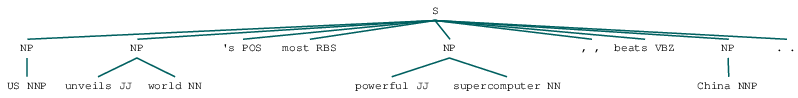

In [61]:
#GHOST SCRIPT IS USED HERE, REFER TO ENVIRONMENT VARIABLE AT TOP OF ENTIRE SCRIPT (FIRST TWO CELLS)
#NEED TO SPECIFY YOUR OWN PATH AFTER DOWNLOADING GHOSTSCRIPT

from nltk.chunk import RegexpParser

#get POS tagged sentence
tagged_simple_sent = nltk.pos_tag(nltk.word_tokenize(sentence))
print('POS Tags:', tagged_simple_sent)

#illustrate NP chunking based on explicit CHUNK patterns
chunk_grammar = '''
NP: {<DT>?<JJ>*<NN.*>}
'''

rc = RegexpParser(chunk_grammar)
c = rc.parse(tagged_simple_sent)

#print and chunked sentence using chunking
print(c)
c

(S
  (NP US/NNP)
  unveils/JJ
  (NP world/NN 's/POS most/RBS)
  powerful/JJ
  (NP supercomputer/NN ,/,)
  beats/VBZ
  (NP China/NNP ./.)) 

Shallow parsing using chinking:


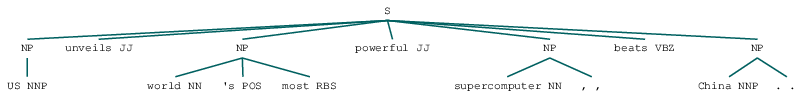

In [62]:
#illustrate NP chunking based on explicit CHINK patterns
chink_grammar = '''
NP:
    {<.*>+}               #Chunk everything as NPO
    }<VBZ|VBD|JJ|IN>+{    #Chink sequences of VBD\VBZ\JJ\IN
'''

rc = RegexpParser(chink_grammar)
c = rc.parse(tagged_simple_sent)

#print and view chunked sentence using chinking
print(c, '\n')
print('Shallow parsing using chinking:')
c


(S
  (NP US/NNP)
  (NP unveils/JJ world/NN)
  's/POS
  (ADVP most/RBS)
  (NP powerful/JJ supercomputer/NN)
  ,/,
  (VP beats/VBZ)
  (NP China/NNP)
  ./.) 

Shallow parsing using generic rules:


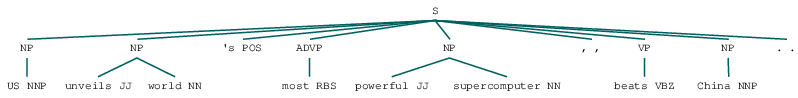

In [63]:
#create a more generic shallow parser
grammar = '''
NP: {<DT>?<JJ>?<NN.*>}
ADJP: {<JJ>}
ADVP: {<RB.*>}
PP: {<IN>}
VP: {<MD>?<VB.*>+}
'''

rc = RegexpParser(grammar)
c = rc.parse(tagged_simple_sent)

#print and view shallow parsed sample sentence
print(c, '\n')
print('Shallow parsing using generic rules:')
c

In [64]:
#Evaluate parser performance on test data
print(rc.evaluate(test_data))

ChunkParse score:
    IOB Accuracy:  46.1%%
    Precision:     19.9%%
    Recall:        43.3%%
    F-Measure:     27.3%%


In [65]:
#leveraging 'tree2conlltags' and 'conlltags2tree'\
#'tree2conlltags':  get triples of word, tag and chunk tags for each token
#'conlltags2tree': to generate a parse tree from these token triples

from nltk.chunk.util import tree2conlltags, conlltags2tree
#look at a sample training tagged sentence
train_sent = train_data[7]
print(train_sent)

(S
  (NP A/DT Lorillard/NNP spokewoman/NN)
  said/VBD
  ,/,
  ``/``
  (NP This/DT)
  is/VBZ
  (NP an/DT old/JJ story/NN)
  ./.)


In [66]:
#get the (word, POS tag, Chunk tag) triples for each token
wtc = tree2conlltags(train_sent)
wtc

[('A', 'DT', 'B-NP'),
 ('Lorillard', 'NNP', 'I-NP'),
 ('spokewoman', 'NN', 'I-NP'),
 ('said', 'VBD', 'O'),
 (',', ',', 'O'),
 ('``', '``', 'O'),
 ('This', 'DT', 'B-NP'),
 ('is', 'VBZ', 'O'),
 ('an', 'DT', 'B-NP'),
 ('old', 'JJ', 'I-NP'),
 ('story', 'NN', 'I-NP'),
 ('.', '.', 'O')]

In [67]:
#get shallow parsed tree back from the WTC triples
tree = conlltags2tree(wtc)
print(tree)

(S
  (NP A/DT Lorillard/NNP spokewoman/NN)
  said/VBD
  ,/,
  ``/``
  (NP This/DT)
  is/VBZ
  (NP an/DT old/JJ story/NN)
  ./.)


In [68]:
'''
Functions to extract POS and Chunk tags from sentences with chunked annotations and reuse the 'combined_taggers()'
function from POS tagging to train multiple taggers with backoff taggers
'''

def conll_tag_chunks(chunk_sents):
    tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t,c) for (w, t, c) in sent] for sent in tagged_sents]

def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff

In [69]:
from nltk.tag import UnigramTagger, BigramTagger
from nltk.chunk import ChunkParserI

class NGramTagChunker(ChunkParserI):
    def __init__(self, train_sentences,
                 tagger_classes=[UnigramTagger, BigramTagger]):
        train_sent_tags = conll_tag_chunks(train_sentences)
        self.chunk_tagger = combined_tagger(train_sent_tags, tagger_classes)
    
    def parse(self, tagged_sentence):
        if not tagged_sentence:
            return None
        pos_tags = [tag for word, tag in tagged_sentence]
        chunk_pos_tags = self.chunk_tagger.tag(pos_tags)
        chunk_tags = [chunk_tag for (pos_tag, chunk_tag) in chunk_pos_tags]
        wpc_tags = [(word, pos_tag, chunk_tag) for ((word,pos_tag), chunk_tag)
                   in zip(tagged_sentence, chunk_tags)]
        return conlltags2tree(wpc_tags)
    

In [70]:
#train the shallow parser
ntc = NGramTagChunker(train_data)

#test parser performance on text data
print(ntc.evaluate(test_data))

ChunkParse score:
    IOB Accuracy:  97.2%%
    Precision:     91.4%%
    Recall:        94.3%%
    F-Measure:     92.8%%


(S
  (NP
    US/NNP
    unveils/NNS
    world/NN
    's/POS
    most/RBS
    powerful/JJ
    supercomputer/NN)
  ,/,
  beats/VBZ
  (NP China/NNP)
  ./.) 

Shallow parsed news headline using n-gram based chunking on treebank data:


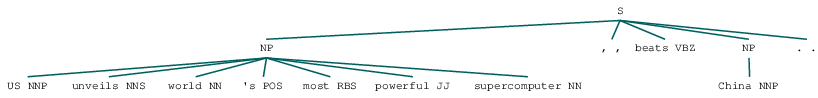

In [71]:
#parse our sample sentence
sentence_nlp = nlp(sentence)
tagged_sentence = [(word.text, word.tag_) for word in sentence_nlp]
tree = ntc.parse(tagged_sentence)
print(tree, '\n')
print('Shallow parsed news headline using n-gram based chunking on treebank data:')
tree

In [72]:
#training and evaluating our parser on the 'conll2000' corpus (Wall Street excerpts)
from nltk.corpus import conll2000
wsj_data = conll2000.chunked_sents()
train_wsj_data = wsj_data[:10000]
test_wsj_data = wsj_data[10000:]

#look at sample sentence in the corpus
print(train_wsj_data[10])

(S
  (NP He/PRP)
  (VP reckons/VBZ)
  (NP the/DT current/JJ account/NN deficit/NN)
  (VP will/MD narrow/VB)
  (PP to/TO)
  (NP only/RB #/# 1.8/CD billion/CD)
  (PP in/IN)
  (NP September/NNP)
  ./.)


In [73]:
#train the shallow parser
tc = NGramTagChunker(train_wsj_data)

#test performance of the test data
print(tc.evaluate(test_wsj_data))

ChunkParse score:
    IOB Accuracy:  89.1%%
    Precision:     80.3%%
    Recall:        86.1%%
    F-Measure:     83.1%%


(S
  (NP US/NNP unveils/NNS world/NN)
  (NP 's/POS most/RBS powerful/JJ supercomputer/NN)
  ,/,
  (VP beats/VBZ)
  (NP China/NNP)
  ./.) 

Shallow parsed news headline using the n-gram based chunking on conll2000 data:


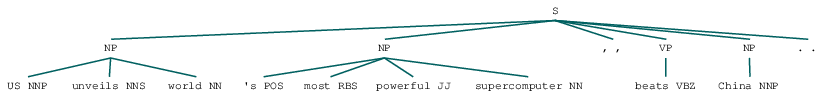

In [74]:
#parse our sample sentence
tree = tc.parse(tagged_sentence)
print(tree, '\n')
print('Shallow parsed news headline using the n-gram based chunking on conll2000 data:')
tree

# Dependency Parsers

In [75]:
dependency_pattern = '{left}<---{word}[{w_type}]--->{right}\n--------'
for token in sentence_nlp:
    print(dependency_pattern.format(word=token.orth_,
                                   w_type=token.dep_,
                                   left=[t.orth_ for t in token.lefts],
                                   right=[t.orth_ for t in token.rights]))

[]<---US[nsubj]--->[]
--------
['US']<---unveils[ROOT]--->['supercomputer', ',', 'beats', '.']
--------
[]<---world[poss]--->["'s"]
--------
[]<---'s[case]--->[]
--------
[]<---most[advmod]--->[]
--------
['most']<---powerful[amod]--->[]
--------
['world', 'powerful']<---supercomputer[dobj]--->[]
--------
[]<---,[punct]--->[]
--------
[]<---beats[conj]--->['China']
--------
[]<---China[dobj]--->[]
--------
[]<---.[punct]--->[]
--------


In [76]:
from spacy import displacy
displacy.render(sentence_nlp, jupyter=True, options={'distance': 110,
                                                    'arrow_stroke': 2,
                                                    'arrow_width': 8})

C:\Users\trevo.DESKTOP-Q3G2N9L\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPDependencyParser instead.
  




Visualizing our news headline annotated dependency tree using NLTK and the Stanford Dependency Parser:


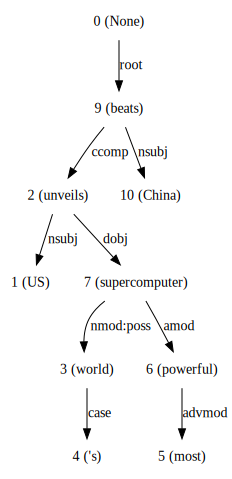

In [80]:
#Introducing the Stanford Dependency Parser
#located at: https://nlp.stanford.edu/software/lex-parser.shtml#History
#Version used in this notebook: 3.9.2 (2018-10-17)
#NEED TO INSTALL SPECIFIC TYPE OF JAVA (jdk-14 is what is used here)
#In the anaconda prompt (as administrator), need to install graphviz with this line (on windows): 
            # conda install -c anaconda python-graphviz 
            # make sure graphviz is loaded into the current environment before starting jupyter

from nltk.parse.stanford import StanfordDependencyParser
import graphviz
path_to_jar = 'C:/Users/trevo.DESKTOP-Q3G2N9L/Documents/Natural Language Processing/Text Analytics with Python/stanford-parser-full-2018-10-17/stanford-parser.jar'
path_to_models_jar = 'C:/Users/trevo.DESKTOP-Q3G2N9L/Documents/Natural Language Processing/Text Analytics with Python/stanford-parser-full-2018-10-17/stanford-parser-3.9.2-models.jar'
sdp = StanfordDependencyParser(path_to_jar=path_to_jar,
                              path_to_models_jar=path_to_models_jar)

#perform dependency parsing
result = list(sdp.raw_parse(sentence))[0]

#generate annotated dependency parse tree
print('\n')
print('Visualizing our news headline annotated dependency tree using NLTK and the Stanford Dependency Parser:')
result

In [81]:
#Generate dependency triples
[item for item in result.triples()]

[(('beats', 'VBZ'), 'ccomp', ('unveils', 'VBZ')),
 (('unveils', 'VBZ'), 'nsubj', ('US', 'NNP')),
 (('unveils', 'VBZ'), 'dobj', ('supercomputer', 'NN')),
 (('supercomputer', 'NN'), 'nmod:poss', ('world', 'NN')),
 (('world', 'NN'), 'case', ("'s", 'POS')),
 (('supercomputer', 'NN'), 'amod', ('powerful', 'JJ')),
 (('powerful', 'JJ'), 'advmod', ('most', 'RBS')),
 (('beats', 'VBZ'), 'nsubj', ('China', 'NNP'))]

(beats (unveils US (supercomputer (world 's) (powerful most))) China) 

Visualizing our news headline raw dependency tree using NLTK and SDP:


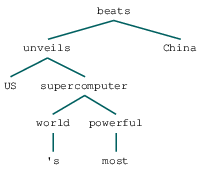

In [85]:
#Print simple dependency parse tree
dep_tree = result.tree()
print(dep_tree, '\n\nVisualizing our news headline raw dependency tree using NLTK and SDP:')


#visualize simple dependency parse tree
dep_tree

# Constituency Parsing

C:\Users\trevo.DESKTOP-Q3G2N9L\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPDependencyParser instead.
  import sys
C:\Users\trevo.DESKTOP-Q3G2N9L\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPParser instead.
  if __name__ == '__main__':


(ROOT
  (SINV
    (S
      (NP (NNP US))
      (VP
        (VBZ unveils)
        (NP
          (NP (NN world) (POS 's))
          (ADJP (RBS most) (JJ powerful))
          (NN supercomputer))))
    (, ,)
    (VP (VBZ beats))
    (NP (NNP China))
    (. .))) 

 Constituency parsing on our sample news headline:


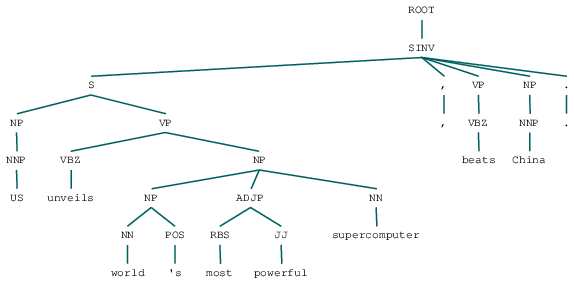

In [89]:
#Set Java Path environment variable - ALREADY DONE AT TOP OF SCRIPT
#Create parser object
from nltk.parse.stanford import StanfordParser
path_to_jar = 'C:/Users/trevo.DESKTOP-Q3G2N9L/Documents/Natural Language Processing/Text Analytics with Python/stanford-parser-full-2018-10-17/stanford-parser.jar'
path_to_models_jar = 'C:/Users/trevo.DESKTOP-Q3G2N9L/Documents/Natural Language Processing/Text Analytics with Python/stanford-parser-full-2018-10-17/stanford-parser-3.9.2-models.jar'
sdp = StanfordDependencyParser(path_to_jar=path_to_jar,
                              path_to_models_jar=path_to_models_jar)

scp = StanfordParser(path_to_jar=path_to_jar, path_to_models_jar=path_to_models_jar)

#get parse tree
result = list(scp.raw_parse(sentence))[0]
#print the constituency parse tree
print(result, '\n\n', 'Constituency parsing on our sample news headline:')
#visualize the parse tree
from IPython.display import display
display(result)

In [90]:
#Building our own PCFG (probabilistic context free grammar) parser
import nltk
from nltk.grammar import Nonterminal
from nltk.corpus import treebank

#load and view training data
training_set = treebank.parsed_sents()
print(training_set[1])

(S
  (NP-SBJ (NNP Mr.) (NNP Vinken))
  (VP
    (VBZ is)
    (NP-PRD
      (NP (NN chairman))
      (PP
        (IN of)
        (NP
          (NP (NNP Elsevier) (NNP N.V.))
          (, ,)
          (NP (DT the) (NNP Dutch) (VBG publishing) (NN group))))))
  (. .))


In [92]:
#extract the productions for all anotated training sentences
treebank_productions = list(
                        set(production
                            for sent in training_set
                            for production in sent.productions()
                           )
                           )
#view some production rules
treebank_productions[0:10]

#add productions for each word, POS tag
for word, tag in treebank.tagged_words():
    t = nltk.Tree.fromstring("("+ tag + " " + word  +")")
    for production in t.productions():
        treebank_productions.append(production)
        
#build the PCFG based grammar
treebank_grammar = nltk.grammar.induce_pcfg(Nonterminal('S'), treebank_productions)

In [93]:
#build the parser
viterbi_parser = nltk.ViterbiParser(treebank_grammar)

#get sample sentence tokens
tokens = nltk.word_tokenize(sentence)

#get parse tree for sample sentence
result = list(viterbi_parser.parse(tokens)) #gives error because some words are not present in our treebank corpus

ValueError: Grammar does not cover some of the input words: "'unveils', 'beats'".

In [95]:
#get tokens and their POS tags and check it
tagged_sent = nltk.pos_tag(nltk.word_tokenize(sentence))
print(tagged_sent)

[('US', 'NNP'), ('unveils', 'JJ'), ('world', 'NN'), ("'s", 'POS'), ('most', 'RBS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', 'VBZ'), ('China', 'NNP'), ('.', '.')]


(S
  (NP-SBJ-2
    (NP (NNP US) (JJ unveils))
    (NP
      (NP (NN world) (POS 's))
      (JJS most)
      (JJ powerful)
      (NN supercomputer)))
  (, ,)
  (VP (VBZ beats) (NP-TTL (NNP China)))
  (. .)) (p=5.06791e-41) 

 Constituency parse tree for our sample news headline based on Treebank annotations:


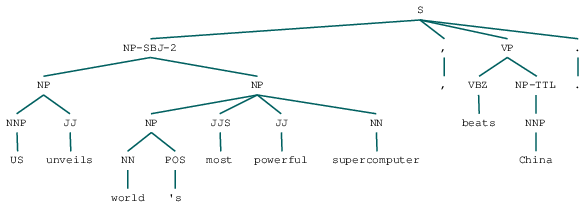

In [99]:
#extend productions for sample sentence tokens
for word,tag in tagged_sent:
    t = nltk.Tree.fromstring("("+ tag + " " + word  +")")
    for production in t.productions():
        treebank_productions.append(production)
        
#rebuild grammar
treebank_grammar = nltk.grammar.induce_pcfg(Nonterminal('S'), treebank_productions)

#rebuild parser
viterbi_parser = nltk.ViterbiParser(treebank_grammar)

#get parse tree for sample sentence
result = list(viterbi_parser.parse(tokens))[0]

#print parse tree - very low p-value in output since it's probabilistic
print(result, '\n\n', 'Constituency parse tree for our sample news headline based on Treebank annotations:')

#visualize parse tree
result